In [1]:
from scipy.stats import norm
from nautilus import Prior

prior = Prior()
prior.add_parameter('a', dist=(-5, +5))
prior.add_parameter('b', dist=(-5, +5))
prior.add_parameter('c', dist=norm(loc=0, scale=2.0))

In [3]:
sources = [
    {
        "position": (222, 111),
        "x_stddev": 1,
        "y_stddev": 1,
        "line": {"width": 3, "mean": 12, "snr": 5},
        "continuum": {"snr": 8}  # Integrated SNR in the continuum map.
    },
    {
        "position": (111, 80),
        "line": {"width": 3, "mean": 19, "snr": 10},
        "continuum": {"snr": 15}
    }
]

print(sources)
for source in sources:
    if "line" in source:
        print('hoi')


[{'position': (222, 111), 'x_stddev': 1, 'y_stddev': 1, 'line': {'width': 3, 'mean': 12, 'snr': 5}, 'continuum': {'snr': 8}}, {'position': (111, 80), 'line': {'width': 3, 'mean': 19, 'snr': 10}, 'continuum': {'snr': 15}}]
hoi
hoi


In [5]:
import numpy as np
from scipy.stats import multivariate_normal

def likelihood(param_dict):
    x = np.array([param_dict['a'], param_dict['b'], param_dict['c']])
    print(x)
    call = multivariate_normal.logpdf(
        x, mean=np.zeros(3), cov=[[1, 0, 0.90], [0, 1, 0], [0.90, 0, 1]])
    print(call)
    print()
    return call

In [6]:
from nautilus import Sampler

sampler = Sampler(prior, likelihood, n_live=1000)
sampler.run(verbose=True)

Starting the nautilus sampler...
Please report issues at github.com/johannesulf/nautilus.
Status    | Bounds | Ellipses | Networks | Calls    | f_live | N_eff | log Z    
[-0.82534698  1.16536888  1.10536086]    | 0        | 1.0000 | 0     | N/A      
-11.934891086102295

[ 4.22973212 -4.27281458  1.62159761]
-32.5658441157262

[-1.60087726  3.63478611 -2.67297798]
-13.809184741429114

[ 1.0010091  -3.21871137  1.08734009]
-7.698976441613167

[-3.8257482   1.72774434 -1.76894917]
-18.113561026193562

[-1.14153034 -4.57711441  1.2350821 ]
-26.523306456258275

[-1.77836012 -2.33104224  3.44554115]
-73.23191291747264

[ 3.64781033 -1.64809863  0.90281748]
-24.84679386611909

[-2.11244443  4.56525701 -0.62103296]
-18.89115078129348

[0.49755944 0.29204684 2.76747134]
-16.253033337787148

[2.23084425 4.23378354 1.64358751]
-13.726248427731875

[ 3.4122672  -0.1709206  -1.60780448]
-65.37228821294663

[1.35343186 4.85302614 1.45359867]
-14.764230667917937

[1.00003943 3.78176573 0.53003704]


np.True_

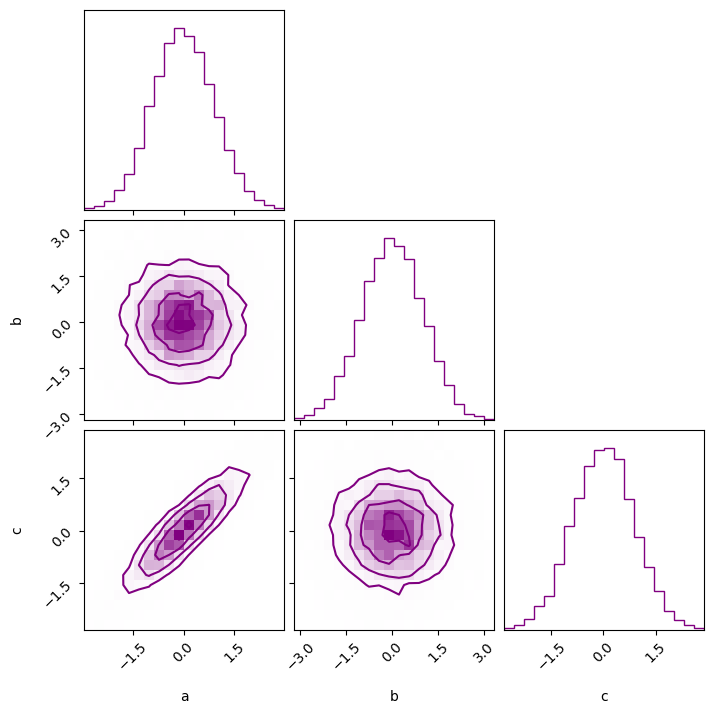

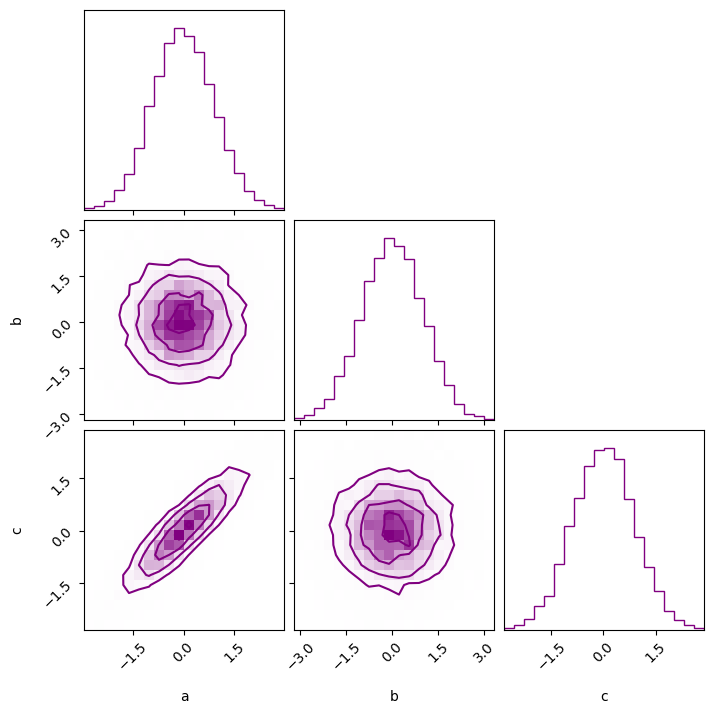

In [4]:
import corner
import matplotlib.pyplot as plt

points, log_w, log_l = sampler.posterior()
corner.corner(
    points, weights=np.exp(log_w), bins=20, labels=prior.keys, color='purple',
    plot_datapoints=False, range=np.repeat(0.999, len(prior.keys)))